# seaborn.countplot
---
Bar graphs are useful for displaying relationships between categorical data and at least one numerical variable. `seaborn.countplot` is a barplot where the dependent variable is the number of instances of each instance of the independent variable.

dataset: [IMDB 5000 Movie Dataset](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
df = pd.read_csv('../../../datasets/movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


For the bar plot, let's look at the number of movies in each category, allowing each movie to be counted more than once.


In [4]:
# split each movie's genre list, then form a set from the unwrapped list of all genres
categories = set([s for genre_list in df.genres.unique() for s in genre_list.split("|")])

# one-hot encode each movie's classification
for cat in categories:
    df[cat] = df.genres.transform(lambda s: int(cat in s))
# drop other columns
df = df[['director_name','genres','duration'] + list(categories)]
df.head()


,director_name,genres,duration,Biography,Western,Documentary,Adventure,Drama,Musical,Reality-TV,...,Family,Romance,Action,Thriller,History,Sport,Horror,Film-Noir,Crime,Music
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,178.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Gore Verbinski,Action|Adventure|Fantasy,169.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Sam Mendes,Action|Adventure|Thriller,148.0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,Christopher Nolan,Action|Thriller,164.0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,Doug Walker,Documentary,NaN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# convert from wide to long format and remove null classificaitons
df = pd.melt(df,
             id_vars=['duration'],
             value_vars = list(categories),
             var_name = 'Category',
             value_name = 'Count')
df = df.loc[df.Count>0]

# add an indicator whether a movie is short or long, split at 100 minutes runtime
df['islong'] = df.duration.transform(lambda x: int(x > 100))

# sort in descending order
#df = df.loc[df.groupby('Category').transform(sum).sort_values('Count', ascending=False).index]

In [6]:
df.head()

,duration,Category,Count,islong
113,206.0,Biography,1,1
257,170.0,Biography,1,1
272,165.0,Biography,1,1
289,140.0,Biography,1,1
290,176.0,Biography,1,1


Basic plot

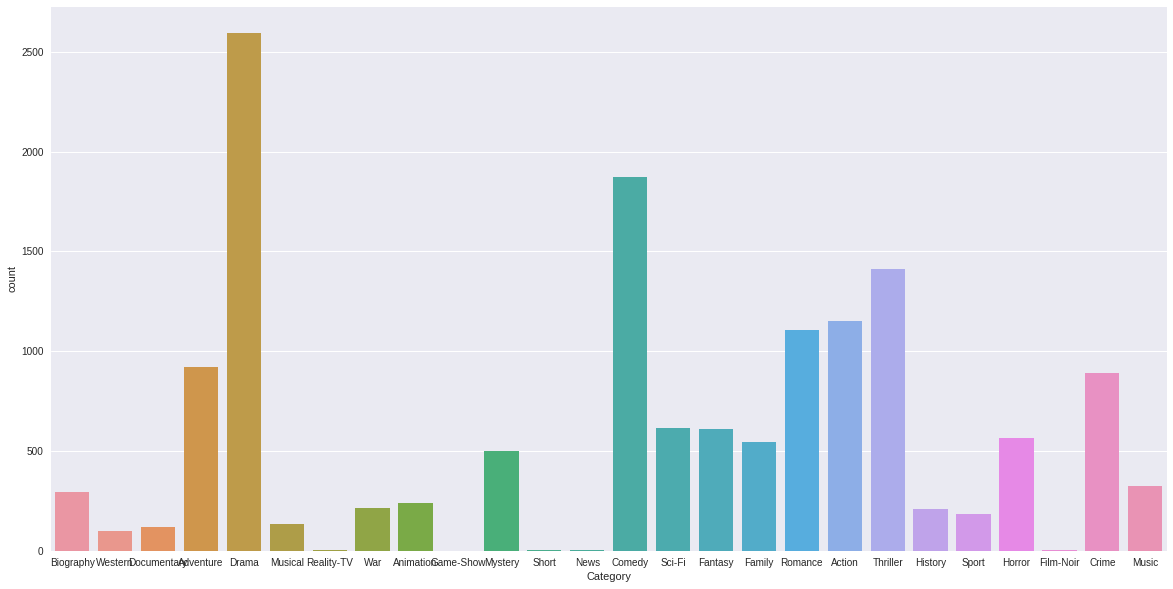

In [7]:
p = sns.countplot(data=df, x = 'Category')

color by a category

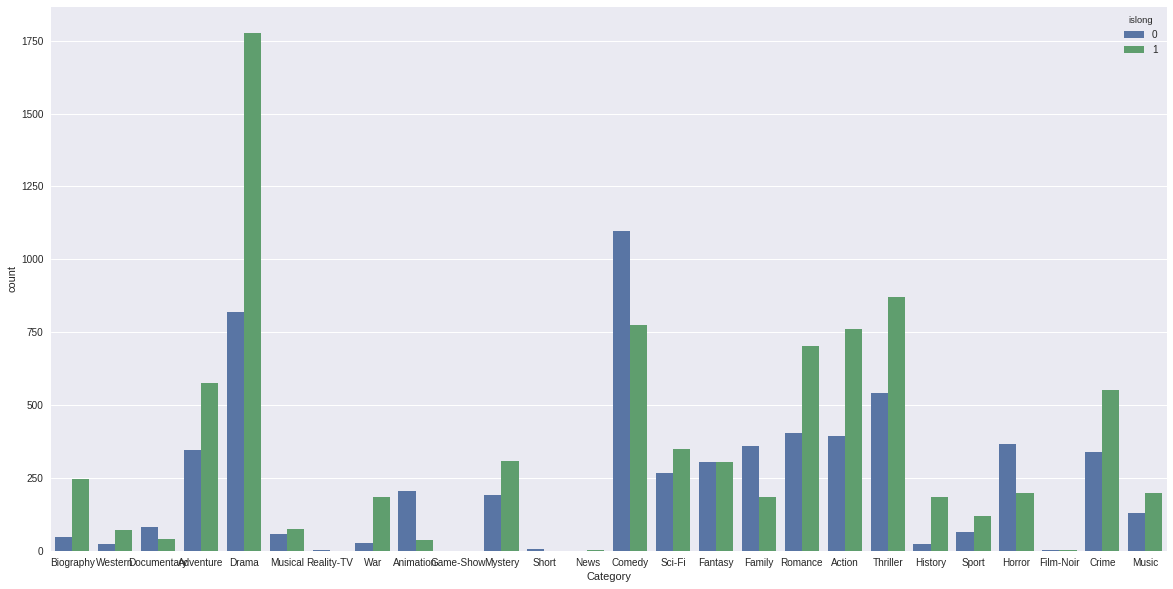

In [8]:
p = sns.countplot(data=df,
                  x = 'Category',
                  hue = 'islong')

make plot horizontal

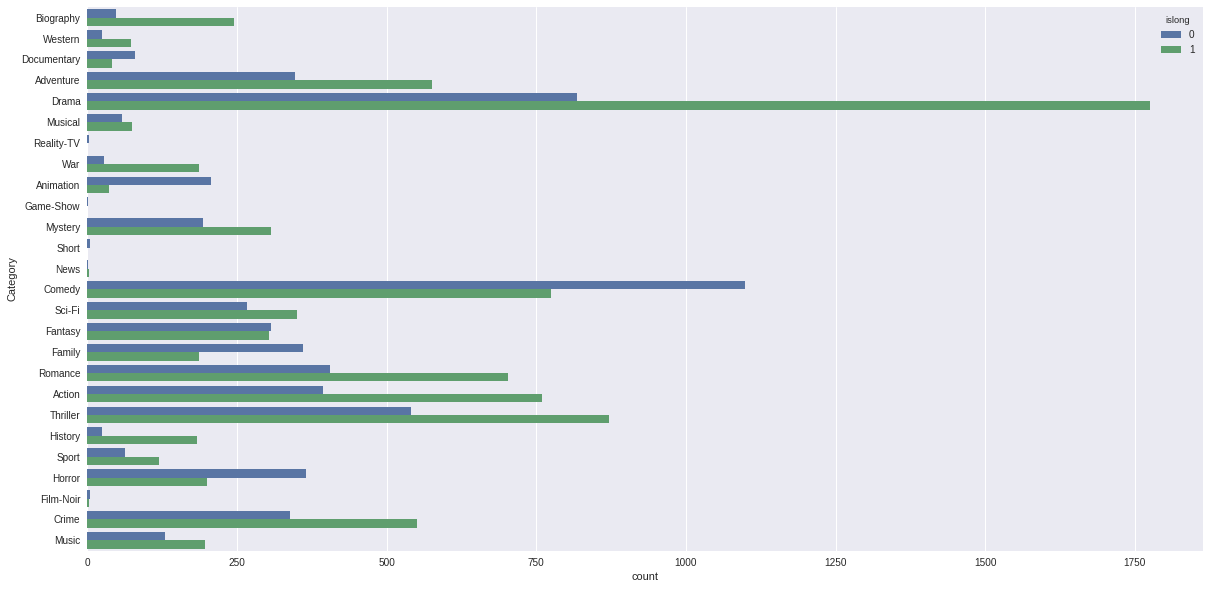

In [9]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong')

Saturation

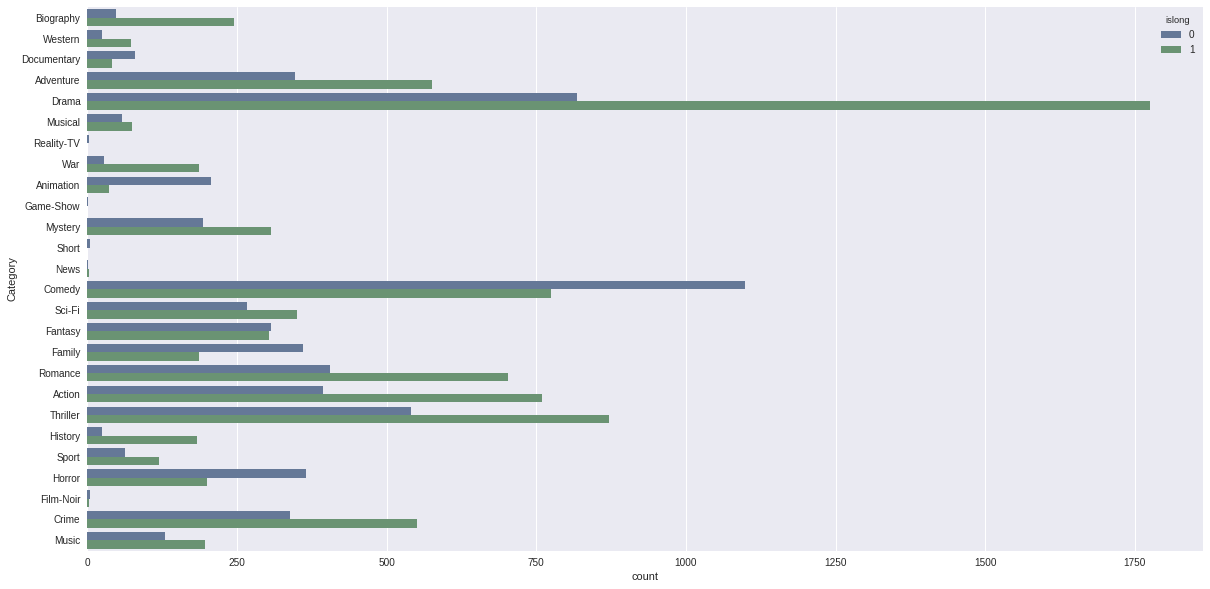

In [10]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.5)

Various palettes

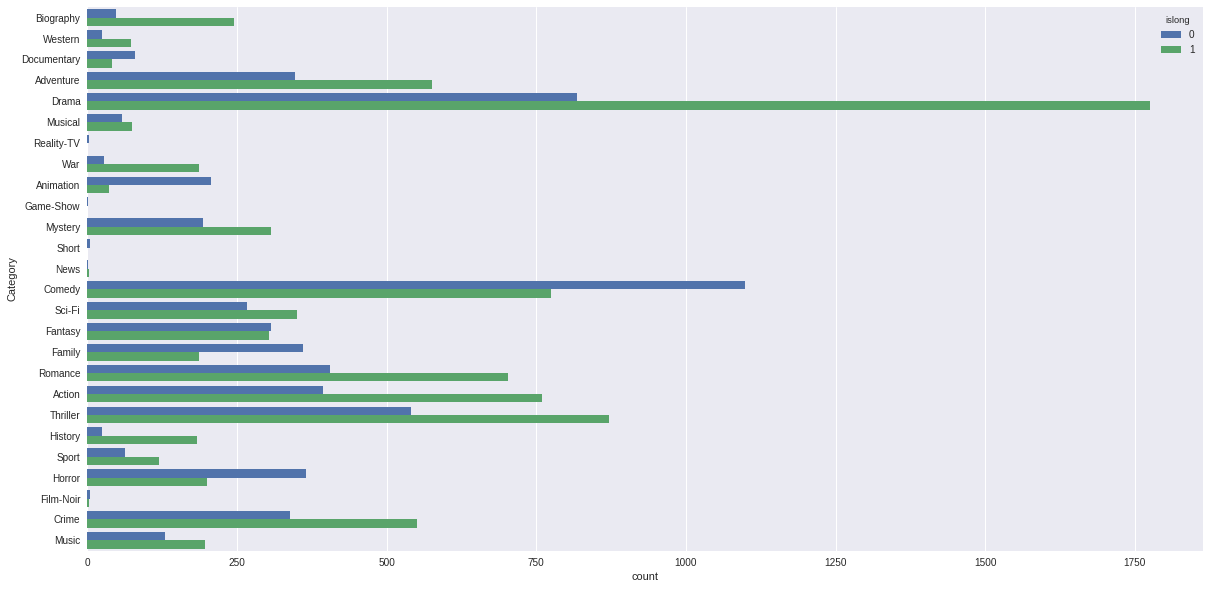

In [11]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = 'deep')

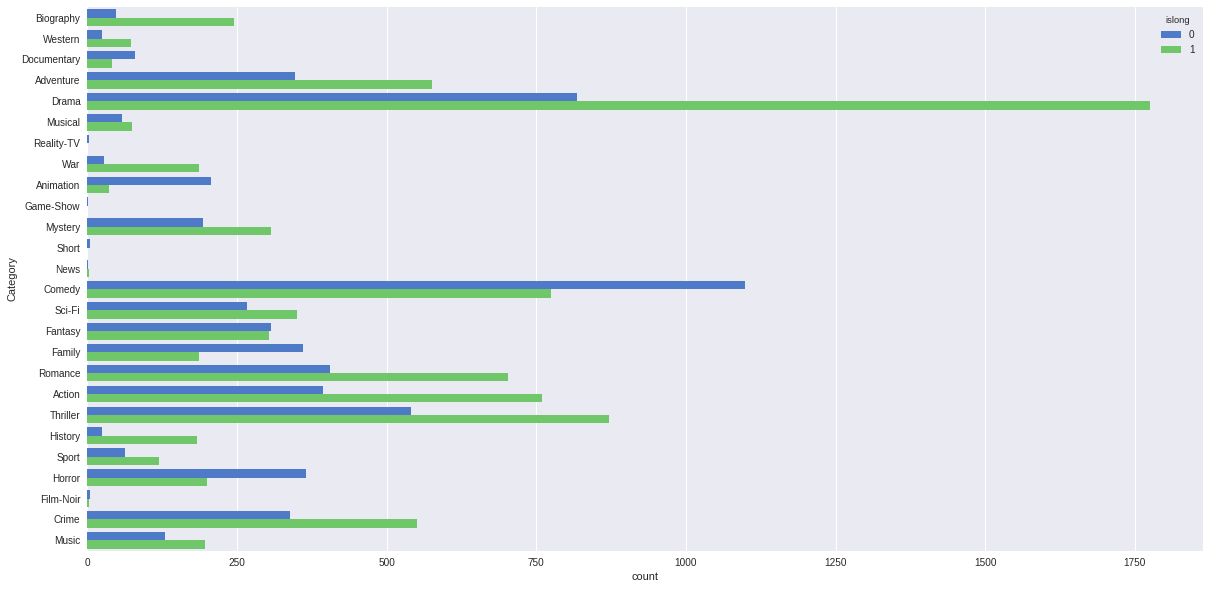

In [12]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = 'muted')

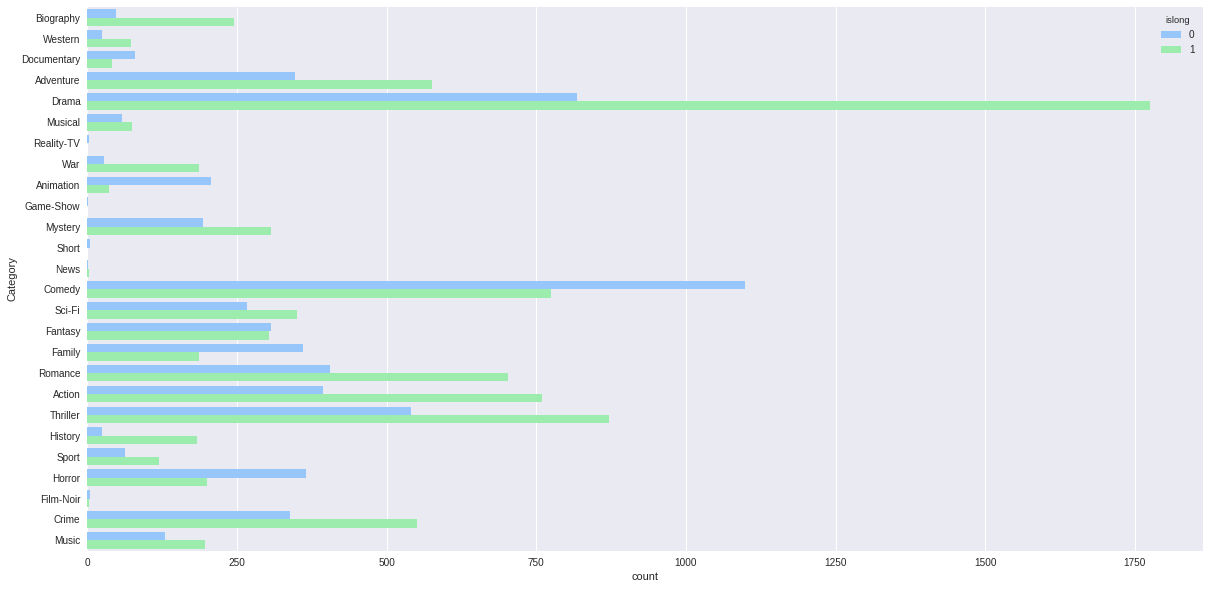

In [13]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = 'pastel')

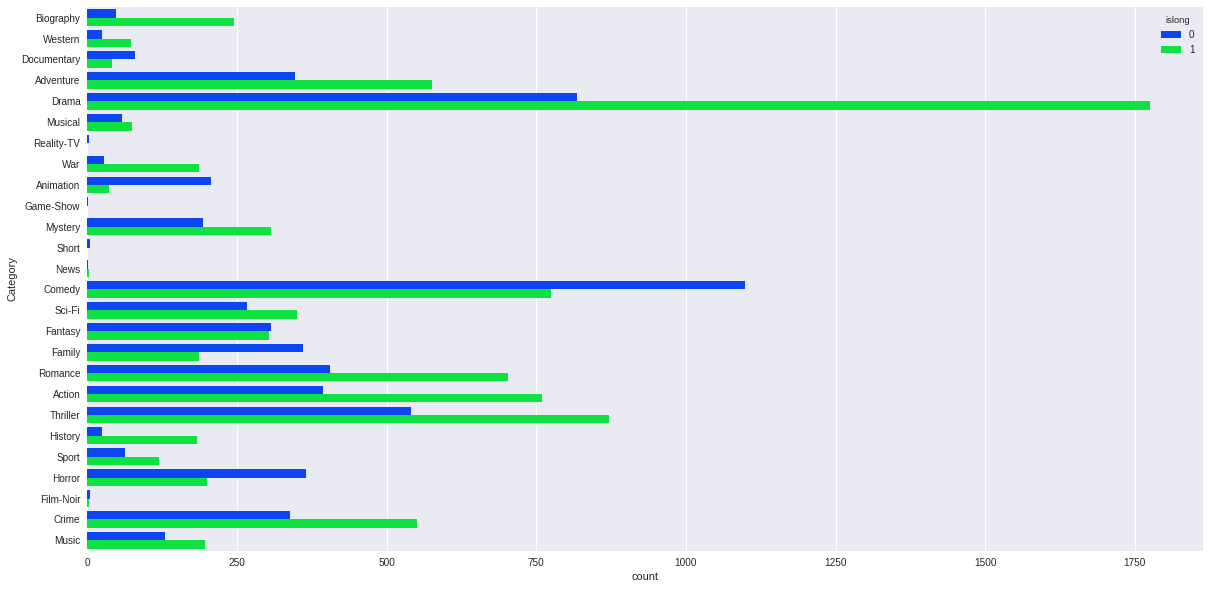

In [14]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = 'bright')

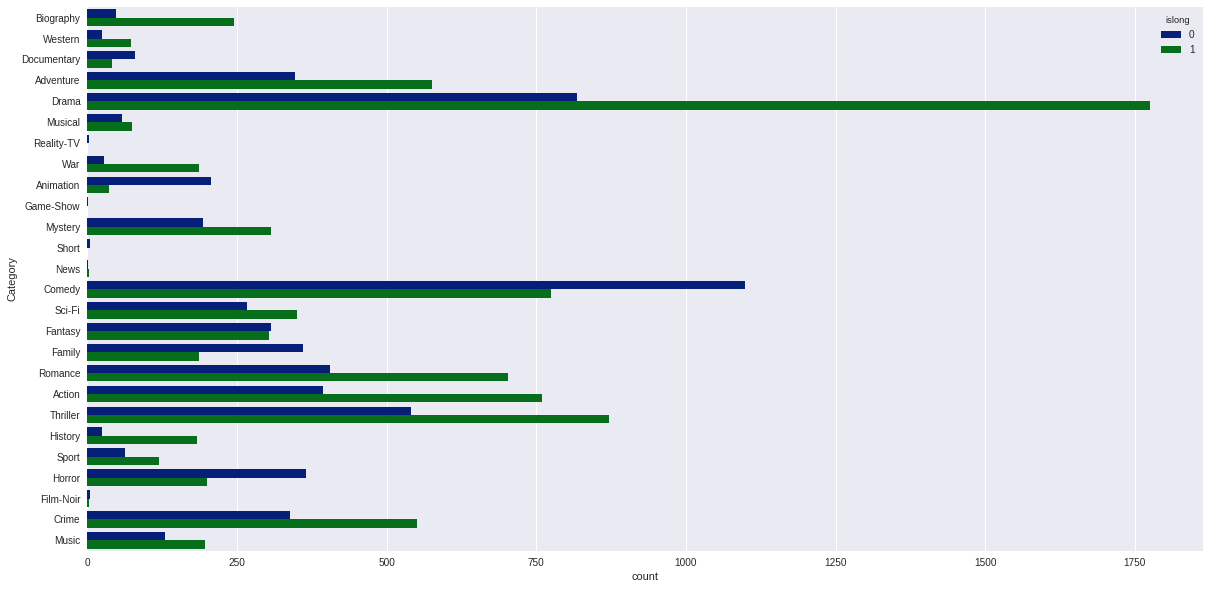

In [15]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = 'dark')

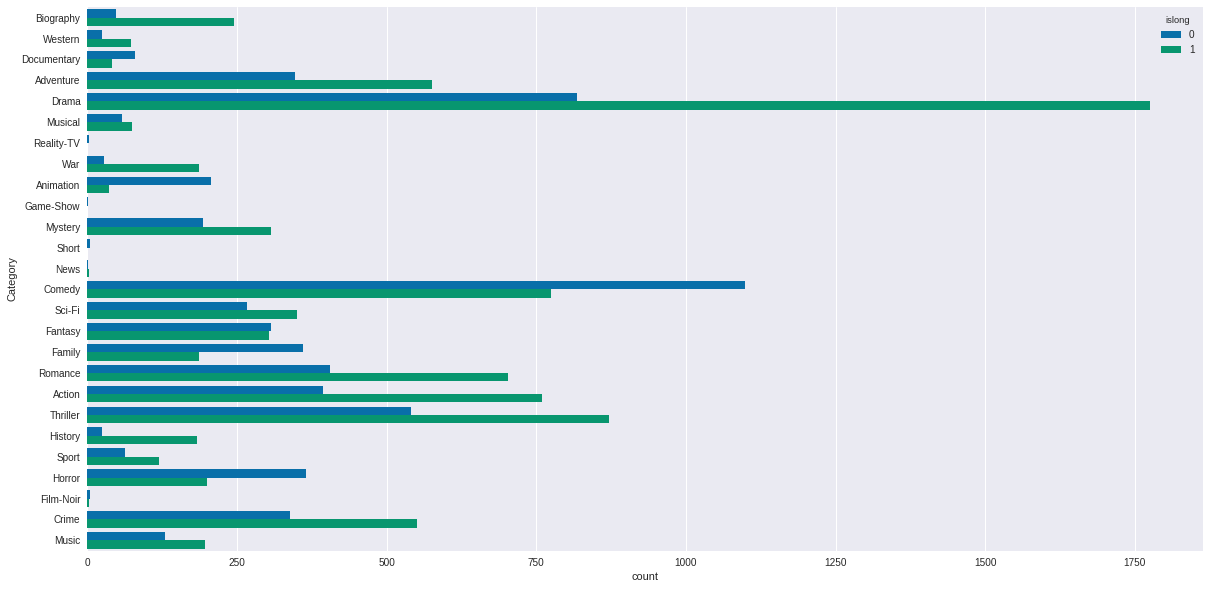

In [16]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = 'colorblind')

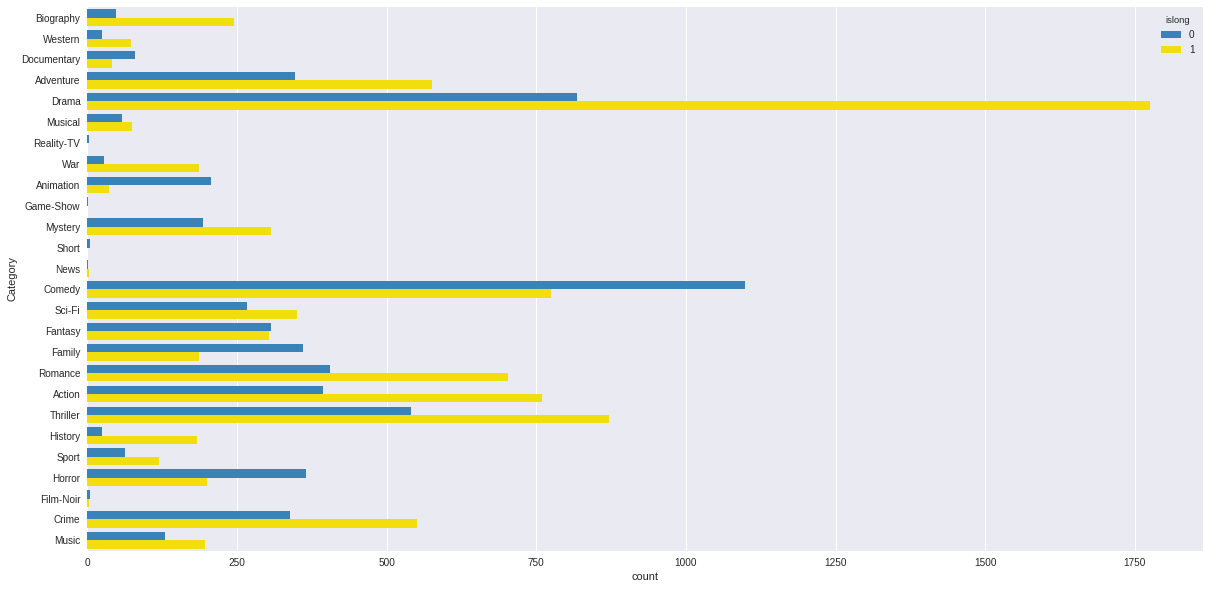

In [17]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = ((50/255, 132/255.0, 191/255.0), (255/255.0, 232/255.0, 0/255.0)))

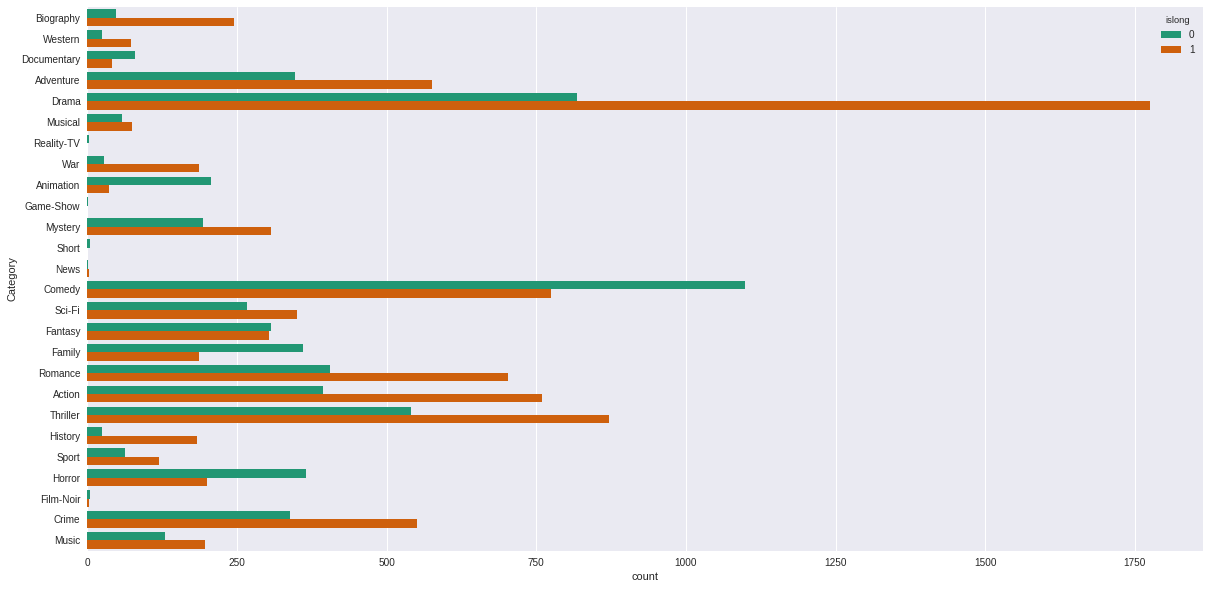

In [18]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=.9,
                  palette = 'Dark2')

In [19]:
help(sns.color_palette)

Help on function color_palette in module seaborn.palettes:

color_palette(palette=None, n_colors=None, desat=None)
    Return a list of colors defining a color palette.
    
    Availible seaborn palette names:
        deep, muted, bright, pastel, dark, colorblind
    
    Other options:
        hls, husl, any named matplotlib palette, list of colors
    
    Calling this function with ``palette=None`` will return the current
    matplotlib color cycle.
    
    Matplotlib paletes can be specified as reversed palettes by appending
    "_r" to the name or as dark palettes by appending "_d" to the name.
    (These options are mutually exclusive, but the resulting list of colors
    can also be reversed).
    
    This function can also be used in a ``with`` statement to temporarily
    set the color cycle for a plot or set of plots.
    
    Parameters
    ----------
    palette: None, string, or sequence, optional
        Name of palette or None to return current palette. If a sequence,

In [20]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - Anything accepted by ``plt.boxplot

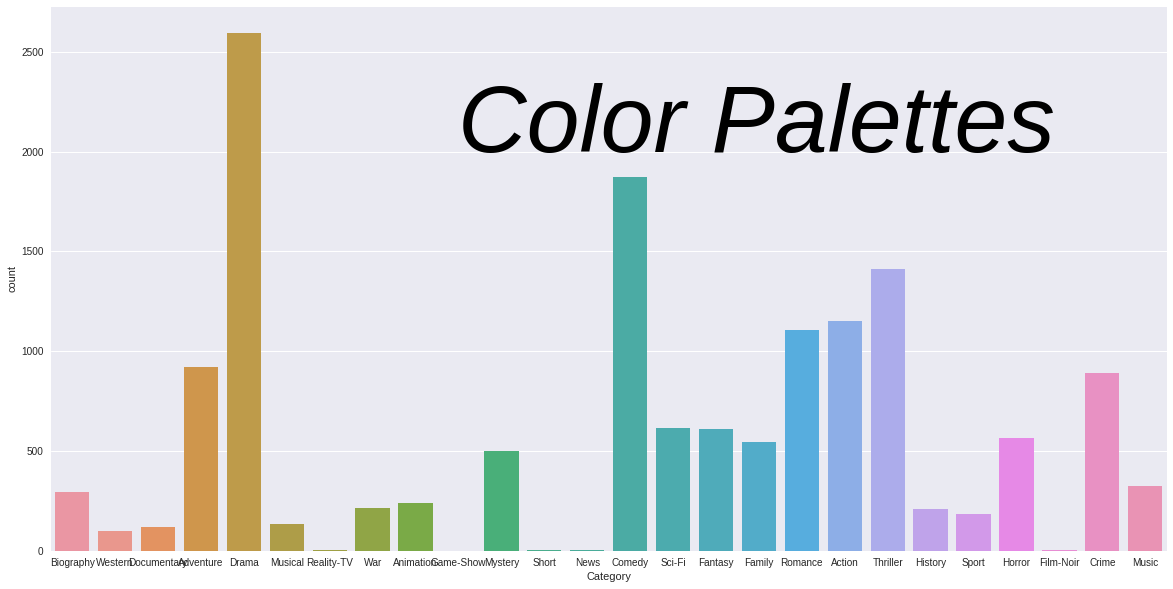

In [21]:
p = sns.countplot(data=df, x = 'Category')
plt.text(9,2000, "Color Palettes", fontsize = 95, color='black', fontstyle='italic')

In [22]:
p.get_figure().savefig('../../figures/colors.png')